In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
california_housing = fetch_california_housing()
#california_housing

In [4]:
data_X = pd.DataFrame(data=california_housing["data"], columns=california_housing["feature_names"])
data_y = pd.DataFrame(data=california_housing["target"], columns=california_housing["target_names"])
data_X.head(), data_y.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
    MedHouseVal
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422)

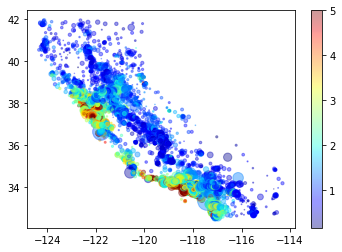

In [5]:
plt.scatter(data_X["Longitude"], 
            data_X["Latitude"], 
            s=data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=data_y["MedHouseVal"])
plt.colorbar()

In [6]:
if type(data_X) != np.ndarray: 
    data_X = data_X.to_numpy()
print(data_X.shape)
if type(data_y) != np.ndarray:
    data_y = data_y.to_numpy()
data_y = data_y.reshape(-1)
print(data_y.shape)

(20640, 8)
(20640,)


In [7]:
print(data_X.shape)
print(data_X[0][1])

(20640, 8)
41.0


[1. 1. 1. 1. 1. 1. 1. 1.]


100%|████████████████████████████████████| 4000/4000 [00:00<00:00, 13174.63it/s]


mininininn:  0
[ 297.53869206 2355.2612594   483.03124181 ...  952.56127021  687.60184183
 1332.55256226]
3184159.1437355047
[1. 1. 1. 0. 1. 1. 1. 1.]

[ 1.07091298e+04  7.09254182e+04  1.45901096e+04  2.95793081e+03
  6.49330763e+06  1.03417476e+04  9.78550085e+04 -3.29679890e+05]

[ 1.07175078e+04  7.09873073e+04  1.46040049e+04  2.96078536e+03
  6.49636315e+06  1.03484218e+04  9.79333028e+04 -3.29942123e+05]


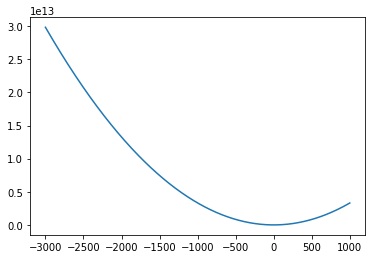

In [8]:
m = len(data_y)
n = len(data_X[1])

weights = np.ones(n)
print(weights)

def forward(w):
    return w.dot(data_X.T)

def error(preds):
    return (1/m)*(np.sum((preds-data_y)**2))

def only(target_index):
    test = np.zeros((m, 8))
    for i in range(m):
        test[i][target_index] = -data_X[i][target_index]
    return test

def get_derivatives(w):
    ret = np.zeros(n)
    for i in range(n):        
        der = (-2/m)*(np.sum((forward(w)-data_y).T.dot(only(i))))
        ret[i] = der
    return ret

min1 = -3000
max2 = 1000
tests = []
thing = weights.copy()
for i in tqdm(range(min1,max2)):
    thing[4] = i
    hy = forward(thing)
    tests.append(error(hy))
    
plt.plot([*range(min1, max2)], tests)
print("mininininn: ", [*range(min1, max2)][np.argmin(tests)])
    

print(forward(weights))
print(error(forward(weights)))
#print(only(5))
test = weights.copy()
test[3] = 0
print(test)
print()
print(get_derivatives(test))
print()
print(get_derivatives(weights))

100%|█████████████████████████████████████| 15000/15000 [17:35<00:00, 14.21it/s]

[1.0091848  0.74572629 1.00647858 1.00139844 0.00253505 0.71732104
 1.10677572 0.62936524]


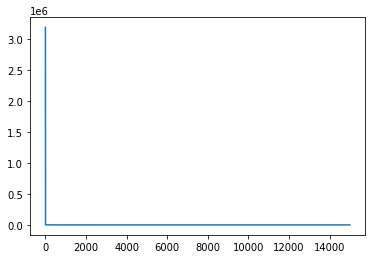

In [22]:
losses = []

n_epochs = 15000
lr = 0.0000001

weights = np.ones(n)

for i in tqdm(range(n_epochs)):
    
    preds = forward(weights)
    loss = error(preds)
    #print(loss)
    losses.append(loss)
    
    derivatives = get_derivatives(weights)
    weights -= lr*derivatives
    
print(weights)

plt.plot([*range(0, n_epochs)], losses)

In [23]:
newpreds = forward(weights)
print(np.mean(data_y-newpreds))
from random import randint
a = randint(0, m)
data_y[a], newpreds[a]

0.2429668395822757


(2.239, -11.043121178361176)

<class 'pandas.core.frame.DataFrame'>


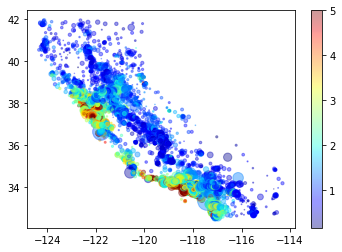

In [24]:
orig_data_X = pd.DataFrame(data=california_housing["data"], columns=california_housing["feature_names"])
orig_data_y = pd.DataFrame(data=california_housing["target"], columns=california_housing["target_names"])

plt.scatter(orig_data_X["Longitude"], 
            orig_data_X["Latitude"], 
            s=orig_data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=orig_data_y["MedHouseVal"])
plt.colorbar()
print(type(orig_data_y))

In [25]:
np.max(newpreds), np.max(data_y), np.min(newpreds), np.min(data_y)

(924.3220341191727, 5.00001, -26.832788762833083, 0.14999)

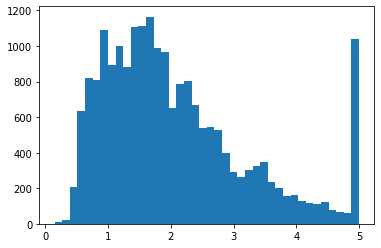

(array([6.3920e+03, 1.3975e+04, 2.5600e+02, 1.0000e+01, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-26.83278876,  -3.05391819,  20.72495238,  44.50382295,
         68.28269353,  92.0615641 , 115.84043467, 139.61930524,
        163.39817581, 187.17704639, 210.95591696, 234.73478753,
        258.5136581 , 282.29252867, 306.07139925, 329.85026982,
        353.62914039, 377.40801096, 401.18688153, 424.96575211,
        448.74462268, 472.52349325, 496.30236382, 520.08123439,
        543.86010497, 567.63897554, 591.41784611, 615.19671668,
      

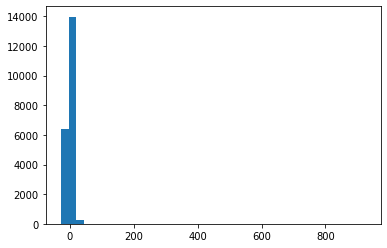

In [26]:
np.mean(newpreds), np.mean(data_y)
plt.hist(data_y, bins=40)
plt.show()
plt.hist(newpreds, bins=40)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


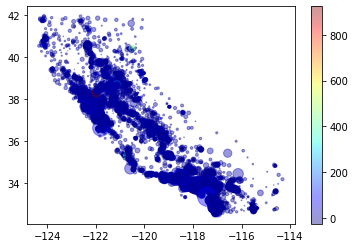

In [27]:
#newpreds = np.clip(newpreds, np.min(data_y), np.max(data_y))

plt.scatter(orig_data_X["Longitude"], 
            orig_data_X["Latitude"], 
            s=orig_data_X["Population"]/100,
            alpha=0.4, 
            cmap=plt.get_cmap("jet"),
            c=newpreds)
plt.colorbar()
print(data_y)

In [28]:
errors = np.log(abs((newpreds-data_y)))

(array([  1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          3.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   2.,   0.,
          1.,   2.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   1.,   0.,   2.,   0.,   5.,   1.,   0.,   4.,   2.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          3.,   1.,   3.,   3.,   6.,   2.,   3.,   2.,   7.,   1.,   2.,
          3.,   1.,   1.,   2.,   4.,   4.,   4.,   1.,   2.,   3.,   2.,
          4.,   6.,   1.,   4.,   4.,   7.,   2.,   2.,   7.,   8.,   7.,
          6.,   4.,   8.,   3.,   7., 

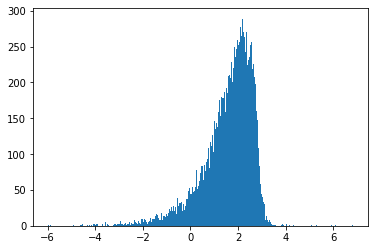

In [29]:
plt.hist(errors, bins=500)